# Exploratory Data Analysis

### This dataset *movies_full.csv* is downloaded to GitHub: https://github.com/nastazya/Movies-analytics/tree/master/data

In [1]:
# import the library
%matplotlib inline

import ast
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 24)

In [2]:
df = pd.read_csv('data/movies_full.csv')
df['release_date'] = pd.to_datetime(df['release_date'])
print(df.dtypes)

id                               int64
title                           object
budget                           int64
revenue                        float64
release_date            datetime64[ns]
popularity                     float64
vote_average                   float64
genres                          object
production_companies            object
cast                            object
keywords                        object
dtype: object


In [3]:
#Setting cast, production_companies, genres and keywords types to a list of dictionaries

df['genres'] = df['genres'].astype(str)
df['production_companies'] = df['production_companies'].astype(str)
df['cast'] = df['cast'].astype(str)
df['keywords'] = df['keywords'].astype(str)

df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x))
df['cast'] = df['cast'].apply(lambda x: ast.literal_eval(x))
df['keywords'] = df['keywords'].apply(lambda x: ast.literal_eval(x))

#checking results
cell = df['genres'][100]
print('\nGenres cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['production_companies'][100]
print('\nProduction_companies cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['cast'][100]
print('\nCast cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['keywords'][100]
print('\nKeywords cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))


Genres cell:  <class 'list'> . 
Cell[0]:  {'id': 27, 'name': 'Horror'} :  <class 'dict'>

Production_companies cell:  <class 'list'> . 
Cell[0]:  {'name': 'William Castle Productions', 'id': 10324} :  <class 'dict'>

Cast cell:  <class 'list'> . 
Cell[0]:  {'cast_id': 5, 'character': 'Dr. Rodney Barrett', 'credit_id': '52fe45dcc3a368484e073031', 'gender': 2, 'id': 46099, 'name': 'William Prince', 'order': 0, 'profile_path': '/w5aLRVfH98WHH5wezzMT9oAB8t0.jpg'} :  <class 'dict'>

Keywords cell:  <class 'list'> . 
Cell[0]:  {'id': 428, 'name': 'nurse'} :  <class 'dict'>


In [4]:
df.head(10)

,id,title,budget,revenue,release_date,popularity,vote_average,genres,production_companies,cast,keywords
0,36523,Felix The Cat: The Movie,9000000,1964253.00,1988-10-01,0.03,3.70,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...","[{'name': 'Pannónia Filmstúdió', 'id': 48669},...","[{'cast_id': 1, 'character': 'Felix the Cat (V...","[{'id': 9820, 'name': 'alternate dimension'}, ..."
1,68351,Sankofa,1000000,2691899.00,1993-05-28,0.05,6.90,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Channel Four Films', 'id': 181}, {'...","[{'cast_id': 6, 'character': 'Sankofa', 'credi...","[{'id': 409, 'name': 'africa'}, {'id': 2831, '..."
2,285908,The Last Breath,3800000,559298.00,1999-03-25,0.07,4.00,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...","[{'name': 'Lions Gate Films', 'id': 35}]","[{'cast_id': 0, 'character': 'Lauren Vaillanco...","[{'id': 10714, 'name': 'serial killer'}]"
3,121173,Voracious,11178,34659.00,2012-09-05,0.08,8.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'name': 'APT Entertainment', 'id': 8355}, {'...","[{'cast_id': 16, 'character': 'Rene', 'credit_...","[{'id': 4694, 'name': 'staged death'}, {'id': ..."
4,110669,Wabash Avenue,2115000,2039000.00,1950-03-31,0.11,7.00,"[{'id': 10402, 'name': 'Music'}]",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'cast_id': 1004, 'character': 'Ruby Summers'...","[{'id': 4344, 'name': 'musical'}, {'id': 4497,..."
5,110428,Camille Claudel 1915,3512454,115860.00,2013-03-13,0.11,7.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...","[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'id': 254, 'name': 'france'}, {'id': 745, 'n..."
6,110428,Camille Claudel 1915,3512454,115860.00,2013-03-13,0.11,7.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...","[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'id': 254, 'name': 'france'}, {'id': 745, 'n..."
7,110428,Camille Claudel 1915,3512454,115860.00,2013-03-13,0.11,7.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...","[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'id': 254, 'name': 'france'}, {'id': 745, 'n..."
8,110428,Camille Claudel 1915,3512454,115860.00,2013-03-13,0.11,7.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...","[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'id': 254, 'name': 'france'}, {'id': 745, 'n..."
9,53863,Star of Midnight,280,831.00,1935-04-19,0.11,5.30,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'RKO Radio Pictures', 'id': 6}]","[{'cast_id': 4, 'character': 'Clay 'Dal' Dalze...","[{'id': 733, 'name': 'dancer'}, {'id': 163110,..."


# Data Perspective
- One variable
    - Numeric variables
        - continuous: budget, revenue
        - discrete: votes, popularity
    - Categorical variables
        - ordinal: date
        - nominal: genre, production_companies, actors, keywords
- Multiple variables
    - Numeric x Numeric
        - budget VS revenue
        - correlation heatmap
    - Categorical x Numeric
        -  Calculate average vote for each genre and show vote distribution
        -  Show the raitings for each Marvel movie (raitings dataset used in this case)
    - Categorical x Categorical
        - actors VS genre
        - production_companies VS genre

## One Variable (numeric)

        - continuous: budget, revenue
        - discrete: votes, popularity

count        4627.00
mean     27022811.00
std      28984352.00
min           113.00
25%       6000000.00
50%      17000000.00
75%      37000000.00
max     150000000.00
Name: budget, dtype: float64


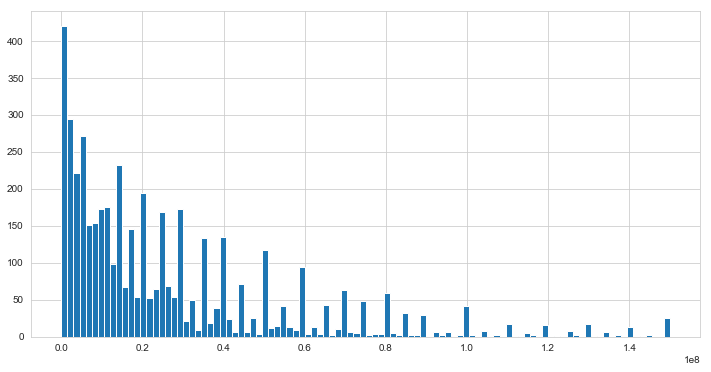

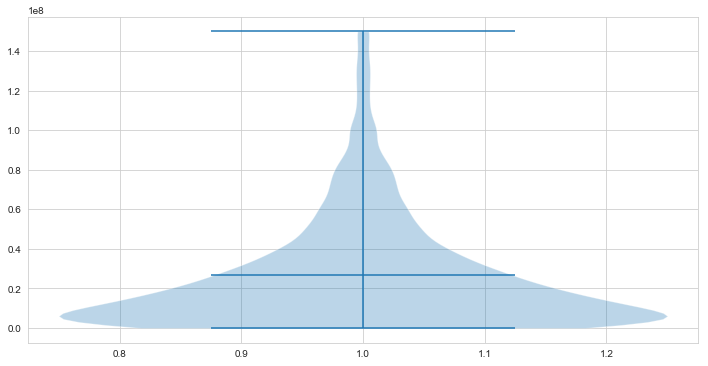

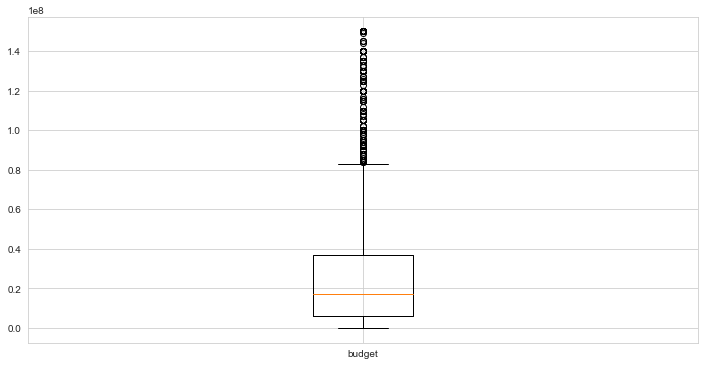

In [5]:
# Analize budget distribution
# There is very large budget dispersion. Most of the movies's budget is below 6M

# Histogram
print(df['budget'].describe().round())
plt.figure(figsize=(12,6))
plt.hist(df['budget'], bins=100)
plt.show()
# Violin and box plot
plt.figure(figsize=(12,6))
plt.violinplot(df['budget'], showmeans=True)
plt.show()
plt.figure(figsize=(12,6))
plt.boxplot(df['budget'])
plt.xticks([1], ['budget'], rotation='horizontal')
plt.show()

count   4627.00
mean       6.28
std        0.86
min        2.00
25%        5.70
50%        6.30
75%        6.90
max        8.70
Name: vote_average, dtype: float64


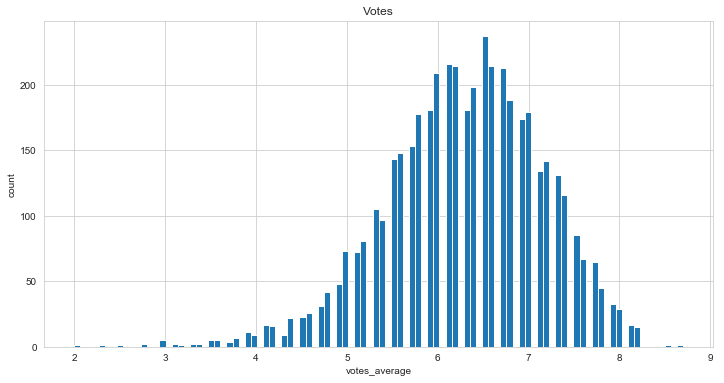

In [6]:
#Analyze votes
# Votes are subject to normal distribution with most of them between 5 and 8

print(df['vote_average'].describe())
plt.figure(figsize=(12,6))
plt.hist(df['vote_average'], bins=100)
plt.title('Votes')
plt.xlabel('votes_average')
plt.ylabel('count')
plt.show()

count   4627.00
mean       8.74
std        4.26
min        0.03
25%        5.94
50%        8.46
75%       11.43
max       22.49
Name: popularity, dtype: float64


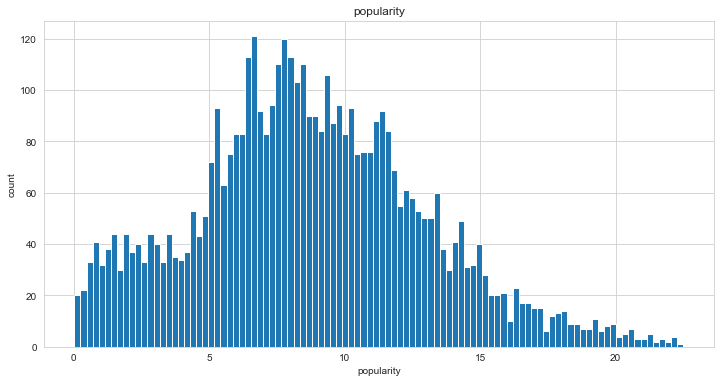

In [7]:
#Analyze popularity
# Popularity has higher variety with average of 8.74. It changes smoother then votes as it is not mesured by the human raiting 
# but by the number of views 
print(df['popularity'].describe())
plt.figure(figsize=(12,6))
plt.hist(df['popularity'], bins=100)
plt.title('popularity')
plt.xlabel('popularity')
plt.ylabel('count')
plt.show()

## One Variable (categorical)

        - ordinal: date
        - nominal: genre, production_companies, actors, keywords

Nominal values (genre, production companies and keywords) have to be extracted from lists of dictionaries

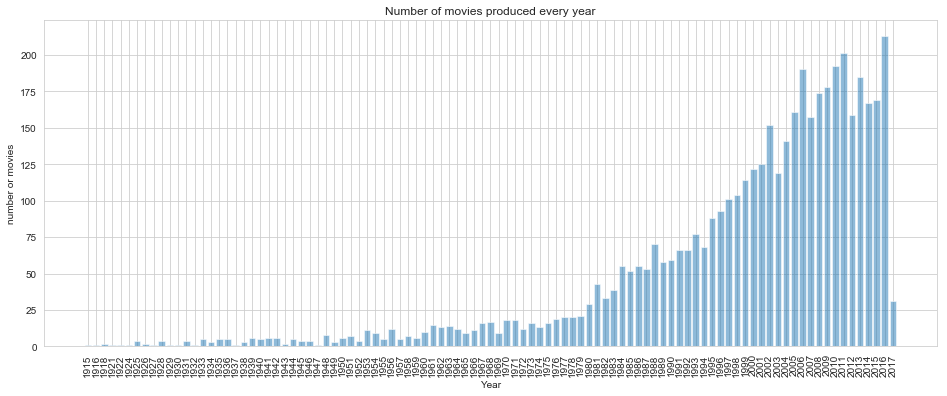

In [8]:
# Analize release date
# We see that there is a strong tendency of grouth movies produced every year
df['year'] = df['release_date'].dt.year
df_year = df.groupby(by='year')['id'].count()

# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Number of movies produced every year')
plt.xlabel('Year')
plt.ylabel('number or movies')
y_pos = range(df_year.count())
plt.bar(y_pos,df_year.values, align='center', alpha=0.5)
plt.xticks(y_pos, df_year.index, rotation='vertical')
plt.show()

Number of Movies in each genre:
1   TV Movie
11   Foreign
40   Documentary
81   Western
173   Music
180   War
218   History
225   Animation
403   Fantasy
417   Mystery
423   Family
519   Science Fiction
543   Horror
750   Adventure
794   Crime
876   Romance
1169   Action
1357   Thriller
1580   Comedy
2287   Drama
Number os genres:  20


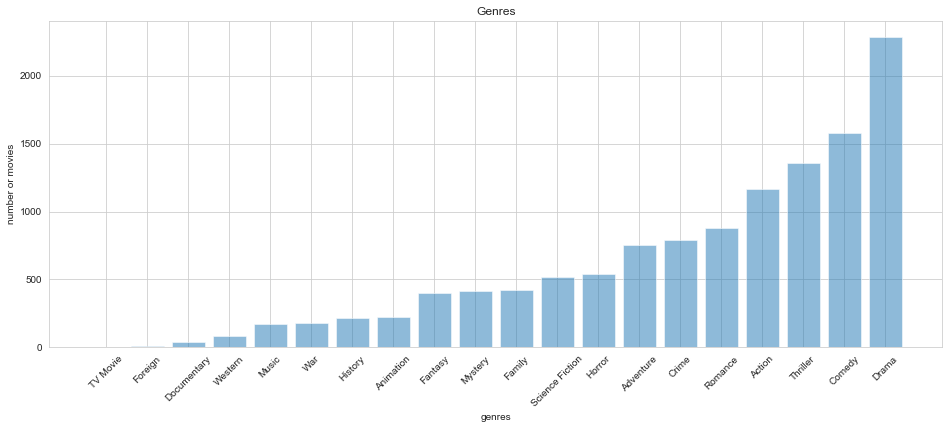

In [9]:
# Analize genres
#There are 20 genres. In our dataset there is only one TV Show and 2287 Dramas (highest number og movies in Drama)
l=[]
for i, item in enumerate(df['genres']):
    for cell in item:
        l.append(cell['name'])
genres_all = np.array(l) 
g_name, g_count = np.unique(genres_all, return_counts=True)
genres = zip(g_name, g_count) # list of Unique Values along with occurrence Count
genres = list(genres)
genres = sorted(genres, key = lambda x: x[1])
print('Number of Movies in each genre:')
for i, elem in enumerate(genres):
    print(genres[i][1], ' ', genres[i][0])
    g_name[i] = elem[0]
    g_count[i] = elem[1]
print('Number os genres: ', len(genres))

# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Genres')
plt.xlabel('genres')
plt.ylabel('number or movies')
y_pos = range(len(g_name))
plt.bar(y_pos,g_count, align='center', alpha=0.5)
plt.xticks(y_pos, g_name, rotation=45)
plt.show()

Number of production companies:  4981


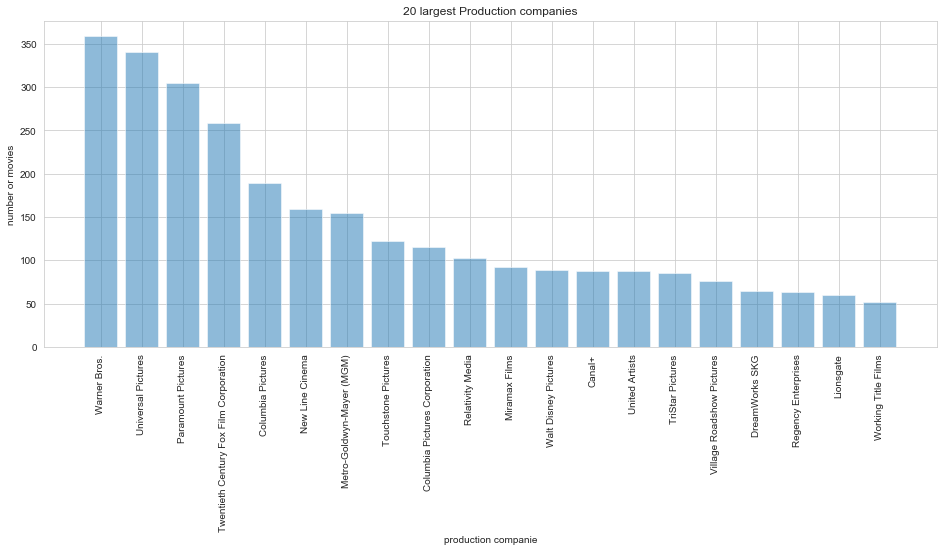

In [10]:
# Analize production companies
# There are 4981 companies in the dataset and the biggest ones are Warner Brothers, Universal Pictures and Paramount 
l=[]
for i, item in enumerate(df['production_companies']):
    for cell in item:
        l.append(cell['name'])
prod_all = np.array(l) 
p_name, p_count = np.unique(prod_all, return_counts=True)
prod = zip(p_name, p_count) # list of Unique Values along with occurrence Count
prod = list(prod)
prod = sorted(prod, key = lambda x: x[1], reverse = True)
print('Number of production companies: ', len(prod))

    
#20 companies which produced the hihest number of movies
p_name_20 = []
p_count_20 = []
for i in range(20):
    p_name_20.append(prod[i][0])
    p_count_20.append(prod[i][1])

# Bar Chart
plt.figure(figsize=(16,6))
plt.title('20 largest Production companies')
plt.xlabel('production companie')
plt.ylabel('number or movies')
y_pos = range(len(p_name_20))
plt.bar(y_pos,p_count_20, align='center', alpha=0.5)
plt.xticks(y_pos, p_name_20, rotation='vertical')
plt.show()

## Multiple variables (Numeric x Numeric)

        - budget VS revenue
        - correlation heatmap

Correlation between budget and revenue: 

          budget  revenue
budget     1.00     0.63
revenue    0.63     1.00


Text(0, 0.5, 'Revenue')

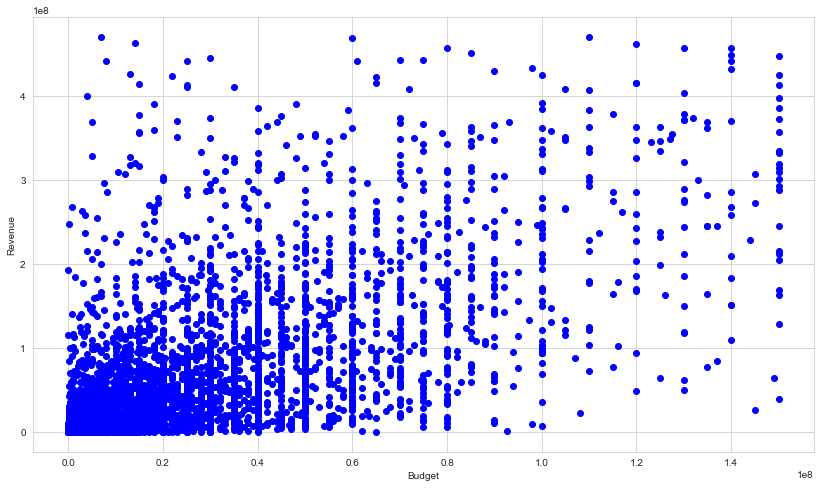

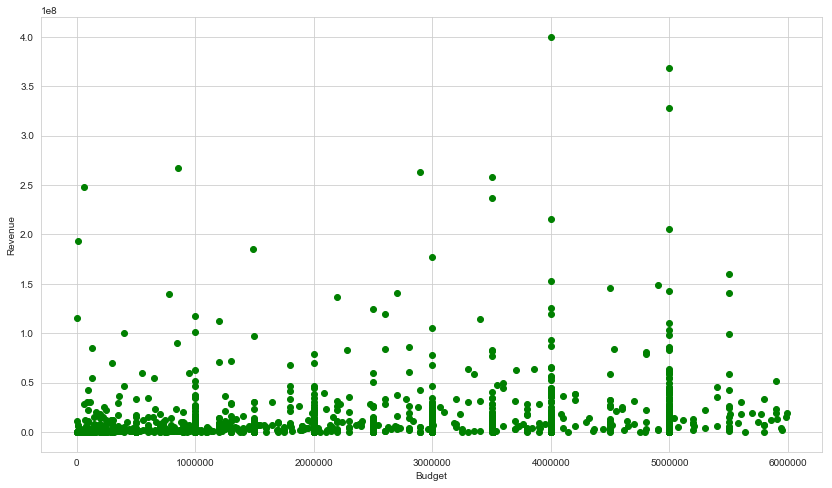

In [11]:
# Budget VS Revenue
plt.figure(figsize=(14,8))
plt.plot(df['budget'], df['revenue'], 'o', color='blue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

print('Correlation between budget and revenue: \n\n', df[['budget','revenue']].corr())

# Visually we can not see that these two are correlated but correlation index is pretty high. 
# This means that many movies are concentrated in the lower left corner. 
# We must cut out some of the movies with hight prices to see better.
# Lets "zoom in" by taking movies with budget less then 6M and we see that with lower budget dependencie tends to be stronger 

df_temp = df[df['budget'] < 6000000]
plt.figure(figsize=(14,8))
plt.plot(df_temp['budget'], df_temp['revenue'], 'o', color='green')
plt.xlabel('Budget')
plt.ylabel('Revenue')

In [12]:
# Correlation
df.corr()

,id,budget,revenue,popularity,vote_average,year
id,1.00,-0.07,-0.06,0.02,-0.01,0.43
budget,-0.07,1.00,0.63,0.36,-0.14,0.27
revenue,-0.06,0.63,1.00,0.44,0.09,0.14
popularity,0.02,0.36,0.44,1.00,0.23,0.14
vote_average,-0.01,-0.14,0.09,0.23,1.00,-0.19
year,0.43,0.27,0.14,0.14,-0.19,1.00


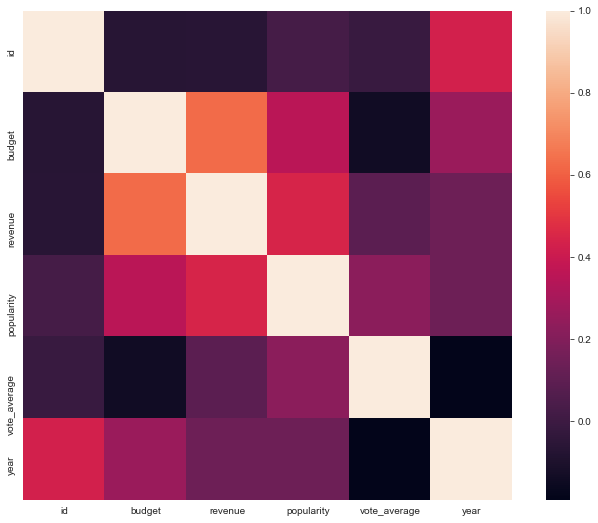

In [13]:
# heatmap
cor = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cor, vmax=1, square=True)
plt.show()

## Multiple variables (Categorical x Numeric)

        -  Calculate average budget spent for each year 
        -  Show the raitings for each Marvel movie (raitings dataset used in this case)

Text(0, 0.5, 'Budget')

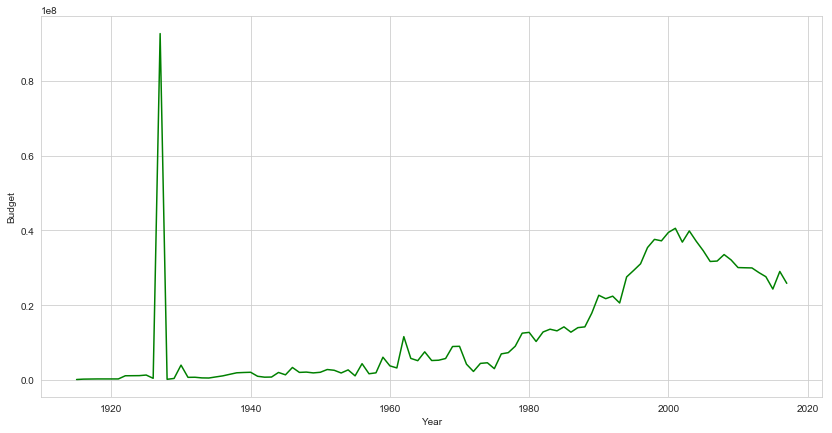

In [14]:
# Calculate average budget spent for each year 
# There is probably an outlies hidden in the dataset as it's not likely to spend this amount on movies in the end of 30's... 
# We will have closer look later
budget_year = df.groupby(by='year')['budget'].mean()
budget_year.sort_values()

plt.figure(figsize=(14,7))
plt.plot(budget_year.index, budget_year.values, '-', color = 'green')
plt.xlabel('Year')
plt.ylabel('Budget')

number of rows in df_marvel:  22


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

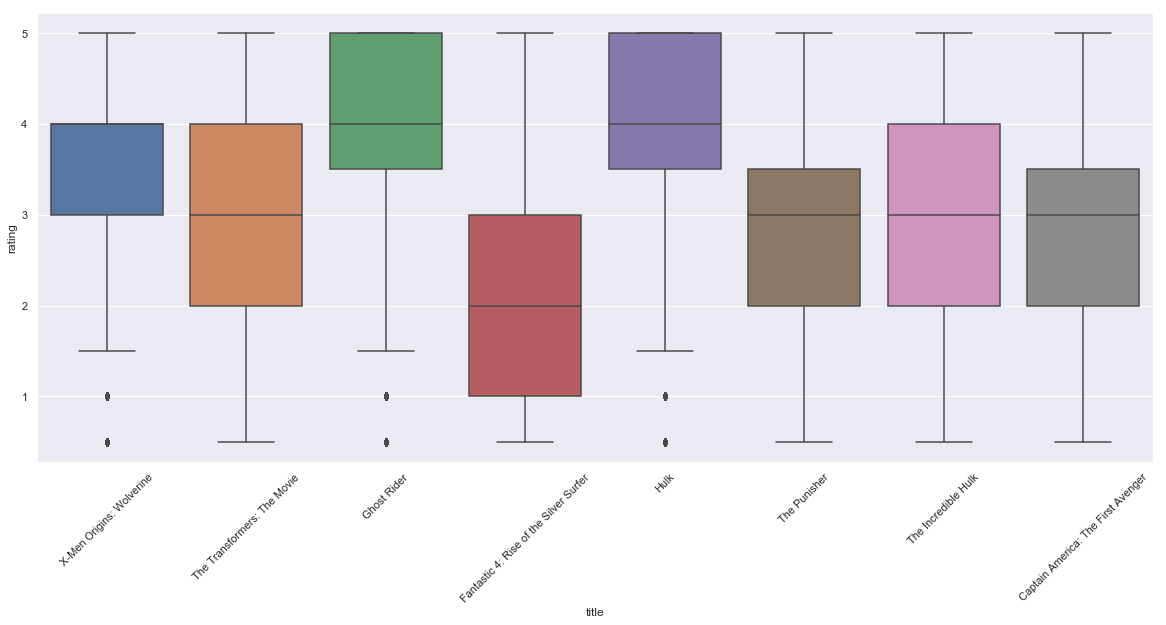

In [15]:
# Show the raitings for each Marvel movie
value_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
marvel = df.iloc[value_extractor(df, 'production_companies', 'Marvel'),:]
print('number of rows in df_marvel: ', marvel['id'].count())
marvel.sort_values(by='budget')
marvel.reset_index(drop=True, inplace=True)

marvel = marvel[['id','title']]

#Add raitings to a temporary dataframe from different dataset
ratings = pd.read_csv('data/ratings.csv')
ratings.rename(columns={'movieId':'id'}, inplace=True)
del_index = ratings[ratings['rating'] == 0].index
ratings.drop(del_index, inplace=True)
ratings.reset_index(drop=True, inplace=True)

marvel = marvel.merge(ratings, on='id', how='inner')

sns.set(rc={'figure.figsize':(20,8.27)})
sns.boxplot(x=marvel['title'], y=marvel['rating'])
plt.xticks(rotation=45)

## Multiple variables (Categorical x Categorical)

        - production_companies VS genre

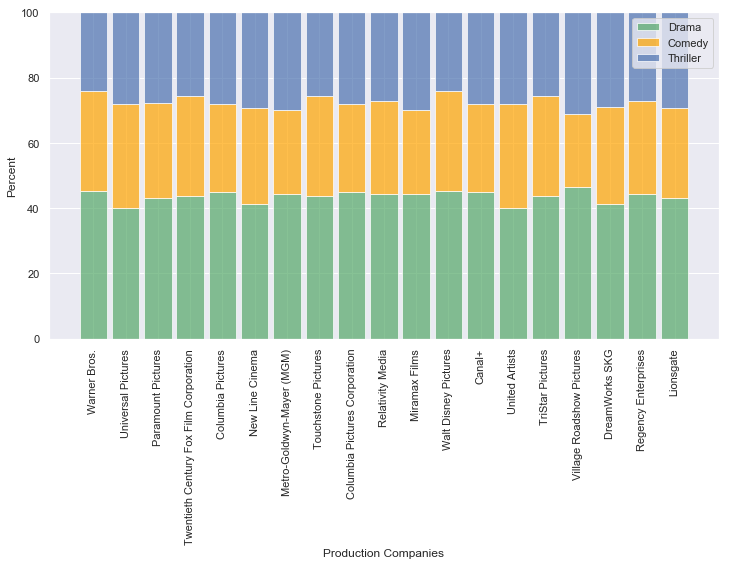

In [16]:
# Percentage ratio of the number of films in the three largest genres (Drama, Comedy, Thriller) 
# for each of the 20 biggest companies
# Results don't differemciate much. We can make some conclusions as: Universal produces more thrillers and less dramas then 
# Warner brothers

#Extracting list of companies into prod
l=[]
for i, item in enumerate(df['production_companies']):
    for cell in item:
        l.append(cell['name'])
p_name, p_count = np.unique(np.array(l), return_counts=True)
prod_all_list = list(zip(p_name, p_count)) # list of Unique Values along with occurrence Count

#Sorting by number of movies in order to get 20 biggect comanies 
prod_all = sorted(prod_all_list, key = lambda x: x[1], reverse = True) 

# Getting names of 20 companies into a list
prod = []
for i in range(19):
    prod.append(prod_all[i][0])

# Two-level extraction:  
# Rows with each Production company and number of Genres as internal extraction
index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]

drama = []
comedy = []
thriller = []
for i, item in enumerate(prod):
    df_prod = df.iloc[index_extractor(df, 'production_companies', item[0]),:]
    drama.append(df_prod.iloc[index_extractor(df_prod, 'genres', 'Drama'),:]['id'].count())
    comedy.append(df_prod.iloc[index_extractor(df_prod, 'genres', 'Comedy'),:]['id'].count())
    thriller.append(df_prod.iloc[index_extractor(df_prod, 'genres', 'Thriller'),:]['id'].count())

raw_data = {'drama': drama, 
            'comedy': comedy, 
            'thriller': thriller}

# From raw value to percentage
totals = [float(i+j+k) for i,j,k in zip(raw_data['drama'], raw_data['comedy'], raw_data['thriller'])]
dBars = [i / j * 100 for i,j in zip(raw_data['drama'], totals)]
cBars = [i / j * 100 for i,j in zip(raw_data['comedy'], totals)]
tBars = [i / j * 100 for i,j in zip(raw_data['thriller'], totals)]

# plot
barWidth = 0.85
names = prod
r = range(len(prod))
plt.figure(figsize=(12,6))
# Create green Bars
plt.bar(r, dBars, edgecolor='white', width=barWidth, alpha=0.7, color='g', label='Drama')
# Create orange Bars
plt.bar(r, cBars, bottom=dBars, edgecolor='white', width=barWidth, alpha=0.7, color='orange', label='Comedy')
# Create blue Bars
plt.bar(r, tBars, bottom=[i+j for i,j in zip(dBars, cBars)], edgecolor='white', width=barWidth, alpha=0.7, color='b', label='Thriller')

# Limit on y-axis
plt.ylim(0,100)

# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.ylabel("Percent")
plt.xlabel("Production Companies")

plt.legend()

# Show graphic
plt.show()



# Business Perspective

- Descriptive
     - Show four most popular genres for the four last decades
     - What is the total yearly budget and revenue for Universal Pictures, starting 1970?
- Diagnostic
     - Does the average vote affect revenue?
     - Does the popularity affect revenue?
     - Does the month of release date affect Revenue?

In [17]:
# Show four most popular genres the four last decades

#Extracting list of genres into prod
l=[]
for i, item in enumerate(df['genres']):
    for cell in item:
        l.append(cell['name'])
g_name, g_count = np.unique(np.array(l), return_counts=True)

#------------------------------------------------------------------------------
# Function that takes dataframe and returns percentages of movies in every genre
def movie_genre(df_10):
    # Extracting mean of votes of each genre into votes
    index_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]
    votes = []
    for i, item in enumerate(g_name):
        votes.append(df_10.iloc[index_extractor(df_10, 'genres', item[0]),:]['popularity'].sum())

    # Calculating percentage
    total_v = np.sum(votes) 
    for i in range(len(votes)):
        votes[i] = votes[i]/total_v*100

    # Zip and Sort by popularity percentage 
    sorted_genres = sorted(list(zip(g_name, votes, g_count)), key = lambda x: x[1], reverse = True)
    return sorted_genres

#-------------------------------------------------------------------------------
# Taking 1980 to 1990
df_10 = df[(df['year']>=1980) & (df['year']<1990)]
g_v_c_1 = movie_genre(df_10)
print('1980-1990: ')
for i in range(4): 
    print(g_v_c_1[i][0], ': ', round(g_v_c_1[i][1],2), '%')

#-------------------------------------------------------------------------------
# Taking 1990 to 2000
df_10 = df[(df['year']>=1990) & (df['year']<2000)]
g_v_c_2 = movie_genre(df_10)
print('\n1990-2000: ')
for i in range(4): 
    print(g_v_c_2[i][0], ': ', round(g_v_c_2[i][1],2), '%')

#-------------------------------------------------------------------------------
# Taking 2000 to 2010
df_10 = df[(df['year']>=2000) & (df['year']<2010)]
g_v_c_3 = movie_genre(df_10)
print('\n2000-2010: ')
for i in range(4): 
    print(g_v_c_3[i][0], ': ', round(g_v_c_3[i][1],2), '%')

#-------------------------------------------------------------------------------
# Taking 2010 to 2020
df_10 = df[(df['year']>=2010) & (df['year']<2020)]
g_v_c_4 = movie_genre(df_10)
print('\n2010-2020: ')
for i in range(4): 
    print(g_v_c_4[i][0], ': ', round(g_v_c_4[i][1],2), '%')


1980-1990: 
Action :  8.97 %
Adventure :  8.97 %
Animation :  8.97 %
Comedy :  7.8 %

1990-2000: 
Comedy :  8.94 %
Crime :  8.94 %
Action :  8.1 %
Adventure :  8.1 %

2000-2010: 
Comedy :  8.41 %
Crime :  8.41 %
Action :  8.35 %
Adventure :  8.35 %

2010-2020: 
Documentary :  8.86 %
Drama :  8.86 %
Comedy :  8.64 %
Crime :  8.64 %


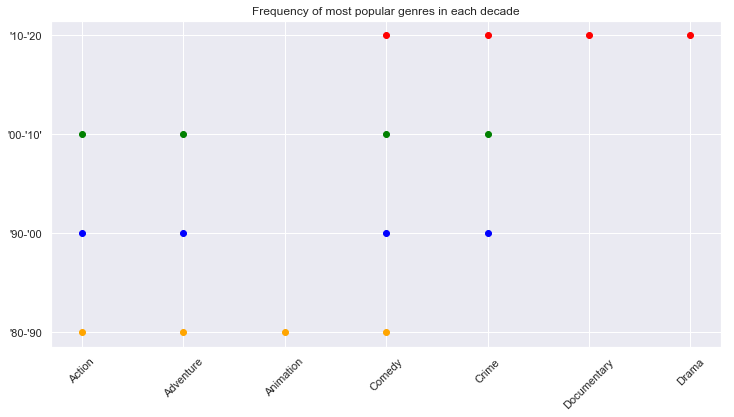

In [18]:
#Showing results
#We are seeing that through 4 decades Comedy is the most popular genre

#Slicing four most popular genres
g1 = [g_v_c_1[x] for x in range(4)]
g2 = [g_v_c_2[x] for x in range(4)]
g3 = [g_v_c_3[x] for x in range(4)]
g4 = [g_v_c_4[x] for x in range(4)]

names_unique = list(np.unique(list([g1[x][0] for x in range(4)]) + list([g2[x][0] for x in range(4)]) + list([g3[x][0] for x in range(4)]) + list([g4[x][0] for x in range(4)])))

values1 = [[names_unique.index(g1[x][0])+1 for x in range(4)],[1 for x in range(4)]]
values2 = [[names_unique.index(g2[x][0])+1 for x in range(4)],[2 for x in range(4)]]
values3 = [[names_unique.index(g3[x][0])+1 for x in range(4)],[3 for x in range(4)]]
values4 = [[names_unique.index(g4[x][0])+1 for x in range(4)],[4 for x in range(4)]]
labels_x = names_unique
labels_y = ["'80-'90", "'90-'00", "'00-'10'", "'10-'20"]
plt.figure(figsize=(12,6))
plt.title('Frequency of most popular genres in each decade')
plt.xticks(range(1,len(labels_x)+2), labels_x, rotation=45)
plt.yticks(range(1,len(labels_y)+2), labels_y, rotation='horizontal')

plt.plot(values1[0], values1[1], 'o', color='orange')
plt.plot(values2[0], values2[1], 'o', color='blue')
plt.plot(values3[0], values3[1], 'o', color='green')
plt.plot(values4[0], values4[1], 'o', color='red')



plt.show()

number of movies of Universal:  364
Total budget per year:
 year
2009    911146652
2003    898000000
2006    880000000
2001    631000000
2016    596500000
2005    577000000
2011    572600000
2000    560000000
2007    547000000
2008    526000000
2013    496000000
2012    491000000
1999    447053648
2010    440000000
1997    417000000
2002    409000000
1998    392500000
1996    341530000
2015    306000000
1995    289500000
2004    250000000
1991    215010000
2014    209000000
1994    204500000
1989    180545760
1990    162000000
1992    157000000
1988    134600000
1993    120000000
1985     96400000
1982     92000000
1984     87000000
1983     66452000
1980     62000000
1978     61700000
1987     58000000
1986     56000000
1979     51500000
1977     28000000
2017     22916000
1981     22500000
1974     13000000
1973     11777000
1970     10000000
1971      7225000
1975      7000000
1972      3500000
1976      2000000
Name: budget, dtype: int64

Total revenue per year:
 year
2001   257147

Text(0, 0.5, '$')

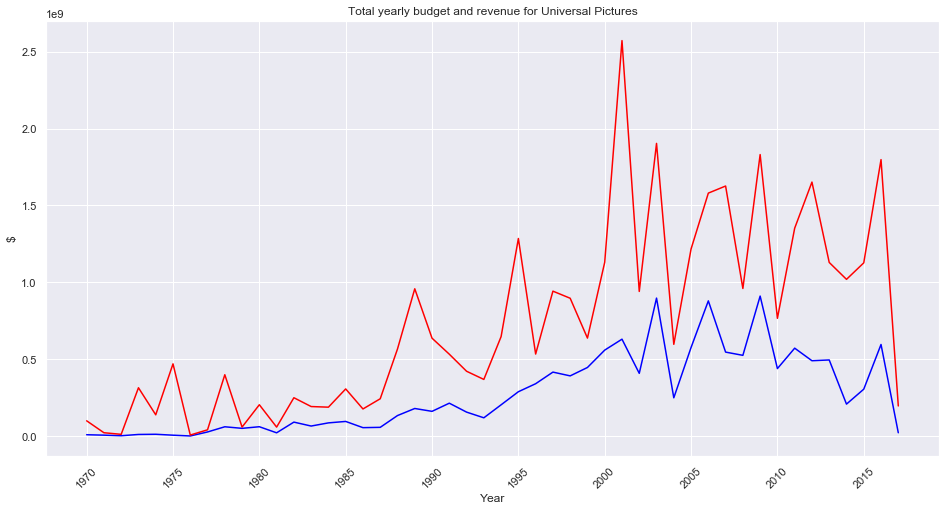

In [30]:
# What is the total yearly budget and revenue for Universal Pictures, starting 1970?

#Extract Universal
value_extractor = lambda df, field, value: [idx for idx, entries in enumerate(df[field]) for item in entries if value in item['name']]

df_u = df.iloc[value_extractor(df, 'production_companies', 'Universal'),:]
print('number of movies of Universal: ', df_u['id'].count())

#Cut of years < 1970
df_u =  df_u[df_u['year'] >= 1970]

budget_year_u = df_u.groupby(by='year')['budget'].sum()
print('Total budget per year:\n', budget_year_u.sort_values(ascending=False))
print('')
revenue_year_u = df_u.groupby(by='year')['revenue'].sum()
print('Total revenue per year:\n', revenue_year_u.sort_values(ascending=False))

plt.figure(figsize=(16,8))
plt.plot(budget_year_u.index, budget_year_u.values, '-', color = 'blue', label='Budget')
plt.plot(revenue_year_u.index, revenue_year_u.values, '-', color = 'red', label='Revenue')
plt.title('Total yearly budget and revenue for Universal Pictures')
labels = [str(x) for x in range(1970, 2020, 5)]
plt.xticks(range(1970, 2020, 5), labels, rotation=45)
plt.xlabel('Year')
plt.ylabel('$')

Correlation between revenue and votes: 

               vote_average  revenue
vote_average          1.00     0.09
revenue               0.09     1.00


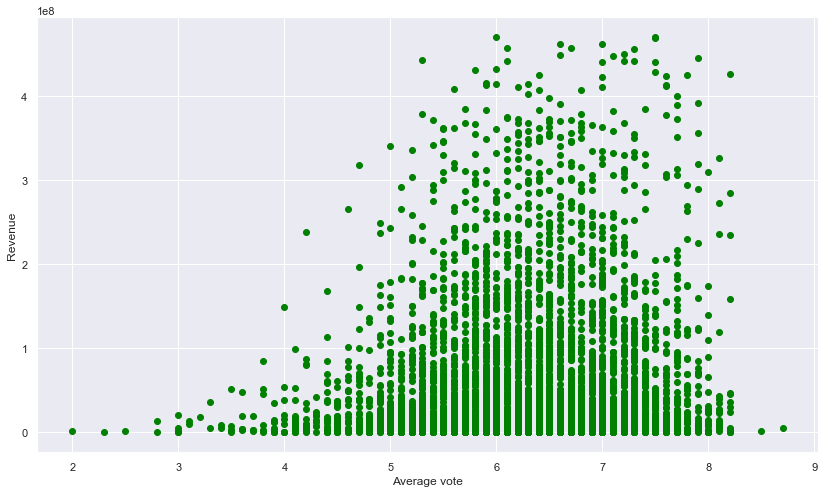

In [20]:
# Does the average vote affect revenue?
#We can see that there is very low correlation between these two features

plt.figure(figsize=(14,8))
plt.plot(df['vote_average'], df['revenue'], 'o', color='green')
plt.xlabel('Average vote')
plt.ylabel('Revenue')

print('Correlation between revenue and votes: \n\n', df[['vote_average','revenue']].corr())

Correlation between revenue and popularity: 

             popularity  revenue
popularity        1.00     0.44
revenue           0.44     1.00


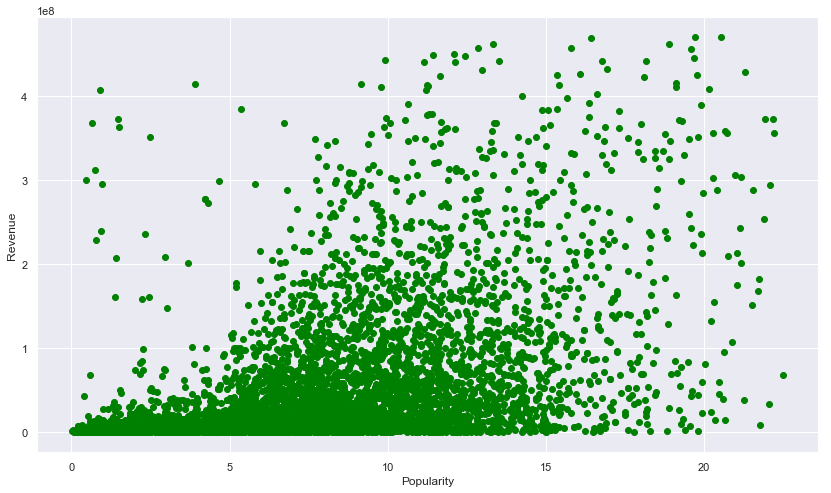

In [21]:
# Does the popularity affect revenue?
#Dependence is not observed

plt.figure(figsize=(14,8))
plt.plot(df['popularity'], df['revenue'], 'o', color='green')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

print('Correlation between revenue and popularity: \n\n', df[['popularity','revenue']].corr())

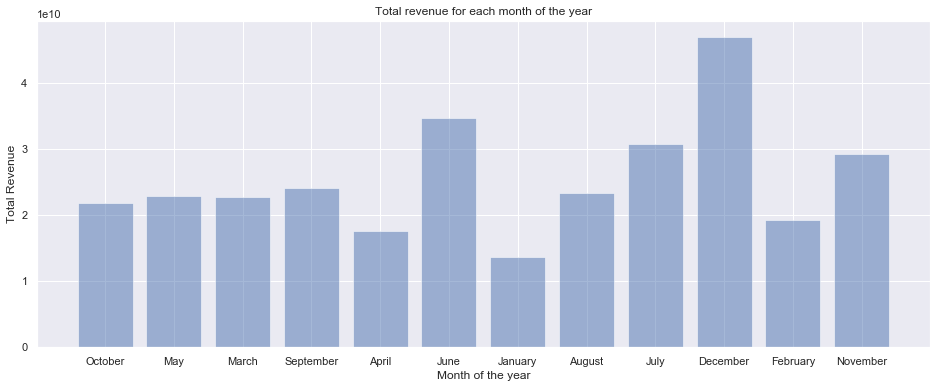

In [22]:
# Does the month of release date affect Revenue?
# December and June are the best month to release the movie

df_m = df.groupby([df['release_date'].dt.month_name()], sort=False)['revenue'].sum()

# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Total revenue for each month of the year')
plt.xlabel('Month of the year')
plt.ylabel('Total Revenue')

plt.bar(df_m.index, df_m.values, align='center', alpha=0.5)
#plt.xticks(12, g_name, rotation=45)
plt.show()